In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib import style
style.use('dark_background')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-vs-cats/sampleSubmission.csv
/kaggle/input/dogs-vs-cats/test1.zip
/kaggle/input/dogs-vs-cats/train.zip


In [2]:
#pip install --user --upgrade tensorflow-gpu

# Unzipping the zips

In [3]:
import zipfile
base_dir_train='/kaggle/input/dogs-vs-cats/train.zip'
local_zip=zipfile.ZipFile(base_dir_train,'r')
local_zip.extractall('/tmp')
local_zip.close()


In [4]:
base_dir_test='/kaggle/input/dogs-vs-cats/test1.zip'
local_zip=zipfile.ZipFile(base_dir_test,'r')
local_zip.extractall('/tmp')
local_zip.close()

In [5]:
dir_train='/tmp/train'
train_images=os.listdir(os.path.join(dir_train))
train_images[0:9]

['dog.890.jpg',
 'dog.1178.jpg',
 'dog.7845.jpg',
 'dog.4632.jpg',
 'cat.3660.jpg',
 'dog.814.jpg',
 'dog.2066.jpg',
 'dog.8575.jpg',
 'dog.1444.jpg']

In [6]:
dir_test='/tmp/test1'
test_images=os.listdir(os.path.join(dir_test))
test_images[0:9]

['10435.jpg',
 '6790.jpg',
 '4644.jpg',
 '1835.jpg',
 '1102.jpg',
 '8962.jpg',
 '6040.jpg',
 '4423.jpg',
 '12072.jpg']

# lets see some images

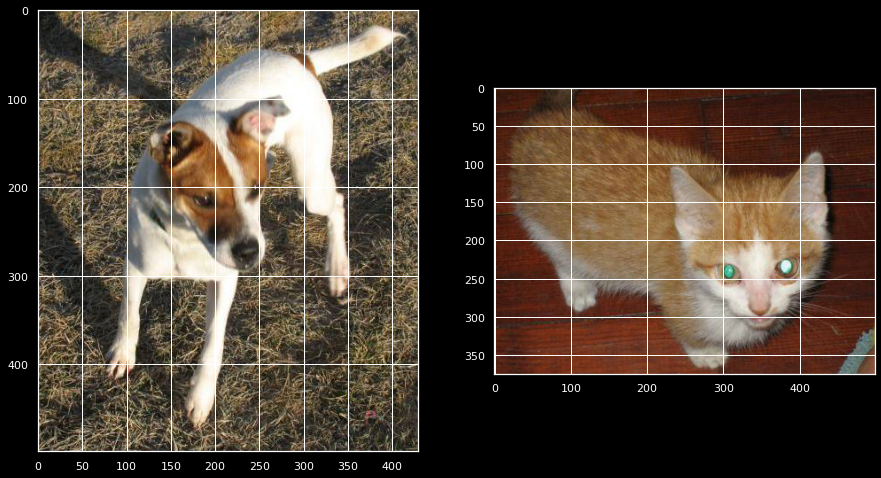

In [7]:
from keras.preprocessing.image import load_img
img1=load_img(dir_train+'/dog.890.jpg')
img2=load_img(dir_train+'/cat.8375.jpg')
f,(ax1,ax2)=plt.subplots(1,2,figsize=(15,15))
ax1.imshow(img1)
ax2.imshow(img2)
plt.show()

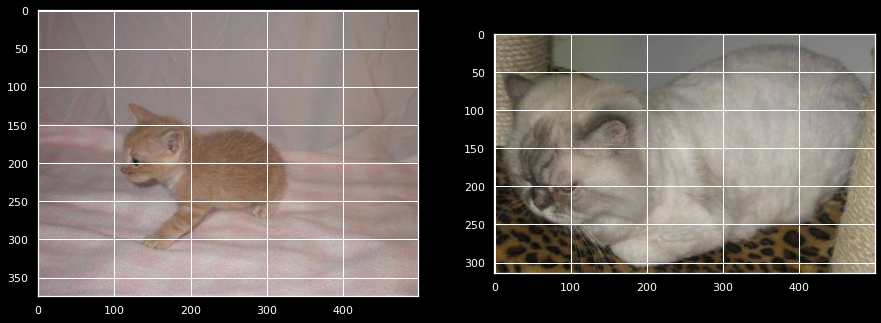

In [8]:
img1=load_img(dir_test+'/4644.jpg')
img2=load_img(dir_test+'/8044.jpg')
f,(ax1,ax2)=plt.subplots(1,2,figsize=(15,15))
ax1.imshow(img1)
ax2.imshow(img2)
plt.show()

# Labelling the train images

In [9]:
filename=train_images
categories=[]
for filenm in filename:
    label=filenm.split('.')[0]
    if label=='dog':
        categories.append(1)
    else:
        categories.append(0)
        
train=pd.DataFrame({'filename':filename,'category':categories}) 
train[0:10]

,filename,category
0,dog.890.jpg,1
1,dog.1178.jpg,1
2,dog.7845.jpg,1
3,dog.4632.jpg,1
4,cat.3660.jpg,0
5,dog.814.jpg,1
6,dog.2066.jpg,1
7,dog.8575.jpg,1
8,dog.1444.jpg,1
9,cat.9803.jpg,0


# Splitting the dataset into train set and validation set

In [10]:
from sklearn.model_selection import train_test_split
train_df,validate_df=train_test_split(train,test_size=0.2,random_state=0)
train_df=train_df.reset_index(drop=True)
validate_df=validate_df.reset_index(drop=True)

In [11]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import applications
from keras.layers import Conv2D,Dense,Dropout,Activation,Flatten,BatchNormalization,MaxPooling2D,GlobalAveragePooling2D,GlobalMaxPooling2D


In [12]:
img_width=150
img_height=150
img_size=(img_width,img_height)
batch_size=16
epochs=15
nb_train_samples=train_df.shape[0]
nb_validation_samples=validate_df.shape[0]

In [13]:
base_model=applications.VGG16(include_top=False,weights='imagenet')
print('VGG16 is loaded....')

for layer in base_model.layers[:11]:
    layer.trainable=False
for layer in base_model.layers[11:]:
    layer.trainable=True    
base_model.summary()

58892288/58889256 [==============================] - 0s 0us/step
VGG16 is loaded....
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
__________________________________________

In [14]:
top_model=Sequential()
top_model.add(GlobalAveragePooling2D(input_shape=base_model.output_shape[1:]))
top_model.add(Dense(512,activation='relu'))
top_model.add(BatchNormalization())
top_model.add(Dropout(0.5))
top_model.add(Dense(256,activation='relu'))
top_model.add(BatchNormalization())
top_model.add(Dropout(0.5))
top_model.add(Dense(128,activation='relu'))
top_model.add(BatchNormalization())
top_model.add(Dropout(0.5))
top_model.add(Dense(1,activation='sigmoid'))
top_model.summary()


# top_model = Sequential()  
# top_model.add(GlobalAveragePooling2D(input_shape=base_model.output_shape[1:]))
# top_model.add(Dense(no_of_classes, activation='softmax')) 
# top_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               262656    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0

In [15]:
from keras import optimizers
model=Sequential()
model.add(base_model)
model.add(top_model)
model.summary()

model.compile(loss='binary_crossentropy', optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),metrics='accuracy')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, None, None, 512)   14714688  
_________________________________________________________________
sequential (Sequential)      (None, 1)                 430593    
Total params: 15,145,281
Trainable params: 13,408,001
Non-trainable params: 1,737,280
_________________________________________________________________


In [16]:
epochs

15

In [17]:
train_datagen=ImageDataGenerator(
   
    vertical_flip=True,
     rotation_range=15,
    rescale=1/255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    
)
train_generator=train_datagen.flow_from_dataframe(
    train_df,
    '/tmp/train',
    x_col='filename',
    y_col='category',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='raw',
    shuffle=False
   
)
valid_datagen=ImageDataGenerator(rescale=1/255)
valid_generator=valid_datagen.flow_from_dataframe(
       validate_df,
        '/tmp/train',
        x_col='filename',
        y_col='category',
       target_size=img_size,
       batch_size=batch_size,
    class_mode='raw',
    shuffle=False
)          
    

Found 20000 validated image filenames.
Found 5000 validated image filenames.


In [18]:
nb_validation_samples

5000

In [19]:
train_df

,filename,category
0,dog.11497.jpg,1
1,cat.10413.jpg,0
2,dog.11976.jpg,1
3,cat.3521.jpg,0
4,cat.8764.jpg,0
...,...,...
19995,dog.12340.jpg,1
19996,cat.8858.jpg,0
19997,dog.2327.jpg,1
19998,dog.7277.jpg,1


In [20]:
batch_size

16

In [21]:
from keras import backend as K

In [22]:
import math
from keras.callbacks import ModelCheckpoint
best_model_path='best_model.hdf5'
checkpointer=ModelCheckpoint(best_model_path,save_best_only=True,verbose=1)

train_size=nb_train_samples//batch_size
validation_size=nb_validation_samples//batch_size
#validation_size=int(math.ceil(nb_validation_samples//batch_size))


history=model.fit_generator(train_generator,
                            epochs=20,
                            validation_data=valid_generator,
                            steps_per_epoch=train_size,
                            validation_steps=validation_size)


Epoch 1/20
1250/1250 [==============================] - 198s 159ms/step - loss: 0.7167 - accuracy: 0.6618 - val_loss: 0.5518 - val_accuracy: 0.7362
Epoch 2/20
1250/1250 [==============================] - 197s 157ms/step - loss: 0.4487 - accuracy: 0.8045 - val_loss: 0.2708 - val_accuracy: 0.8796
Epoch 3/20
1250/1250 [==============================] - 199s 159ms/step - loss: 0.3633 - accuracy: 0.8461 - val_loss: 0.2177 - val_accuracy: 0.9119
Epoch 4/20
1250/1250 [==============================] - 205s 164ms/step - loss: 0.3189 - accuracy: 0.8688 - val_loss: 0.3435 - val_accuracy: 0.8462
Epoch 5/20
1250/1250 [==============================] - 202s 161ms/step - loss: 0.2874 - accuracy: 0.8817 - val_loss: 0.1865 - val_accuracy: 0.9255
Epoch 6/20
1250/1250 [==============================] - 202s 162ms/step - loss: 0.2751 - accuracy: 0.8894 - val_loss: 0.1834 - val_accuracy: 0.9289
Epoch 7/20
1250/1250 [==============================] - 196s 157ms/step - loss: 0.2595 - accuracy: 0.8972 - val_

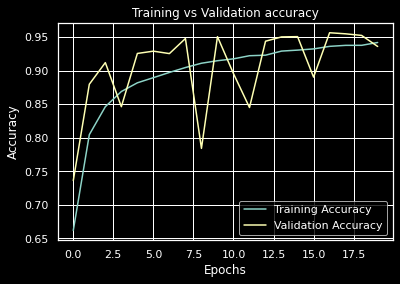

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation accuracy')
plt.legend(['Training Accuracy','Validation Accuracy'],loc='lower right')
plt.show()

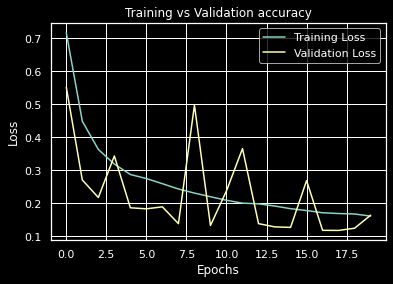

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation accuracy')
plt.legend(['Training Loss','Validation Loss'],loc='upper right')
plt.show()

In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [26]:
y_val=validate_df['category']
val_pred=model.predict_generator(valid_generator,steps=np.ceil(nb_validation_samples/batch_size))
thresh=0.5
val_pred=np.where(val_pred>thresh,1,0)

In [27]:
#y_val=y_val.replace({'dog':1,'cat':0})#

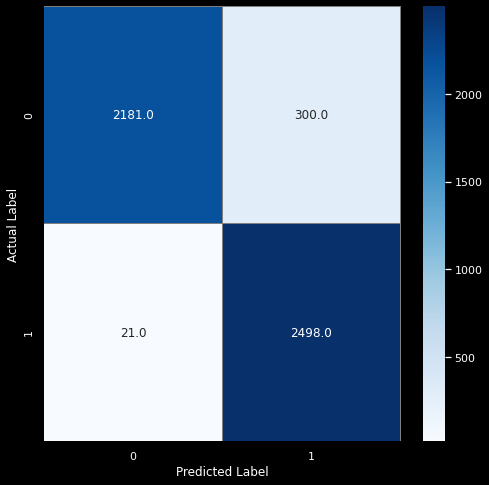

In [28]:

cm=confusion_matrix(y_val,val_pred)
f,ax=plt.subplots(figsize=(8,8))
sns.heatmap(cm,annot=True,linewidth=0.01,cmap='Blues',linecolor='gray',fmt='.1f',ax=ax)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [29]:
accScore=accuracy_score(y_val,val_pred)
print(f' Accuracy Score is {accScore}')
print()
print('classification report is ---->')
print(classification_report(y_val,val_pred))

 Accuracy Score is 0.9358

classification report is ---->
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      2481
           1       0.89      0.99      0.94      2519

    accuracy                           0.94      5000
   macro avg       0.94      0.94      0.94      5000
weighted avg       0.94      0.94      0.94      5000



In [30]:
train_df

,filename,category
0,dog.11497.jpg,1
1,cat.10413.jpg,0
2,dog.11976.jpg,1
3,cat.3521.jpg,0
4,cat.8764.jpg,0
...,...,...
19995,dog.12340.jpg,1
19996,cat.8858.jpg,0
19997,dog.2327.jpg,1
19998,dog.7277.jpg,1


In [31]:
test_df=pd.DataFrame({'filename':test_images})
nb_samples=test_df.shape[0]
test_df

,filename
0,10435.jpg
1,6790.jpg
2,4644.jpg
3,1835.jpg
4,1102.jpg
...,...
12495,4113.jpg
12496,1652.jpg
12497,3826.jpg
12498,8679.jpg


In [32]:
test_datagen=ImageDataGenerator(
rescale=1/255)
test_generator=test_datagen.flow_from_dataframe(
     test_df,
    '/tmp/test1',
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=img_size,
    batch_size=batch_size,
    shuffle=False
)

Found 12500 validated image filenames.


In [33]:
test_pred=model.predict_generator(test_generator,steps=np.ceil(nb_samples/batch_size))
test_pred

array([[0.00403548],
       [0.9991922 ],
       [0.01007381],
       ...,
       [0.9981705 ],
       [0.00567456],
       [0.9990977 ]], dtype=float32)

In [34]:
thresh=0.5
test_pred=np.where(test_pred>thresh,1,0)
test_pred[0:5]

array([[0],
       [1],
       [0],
       [0],
       [0]])

In [35]:
test_df['filename'][0:10]

0    10435.jpg
1     6790.jpg
2     4644.jpg
3     1835.jpg
4     1102.jpg
5     8962.jpg
6     6040.jpg
7     4423.jpg
8    12072.jpg
9     1806.jpg
Name: filename, dtype: object

In [36]:
test_pred[0:10]

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0]])

In [37]:
test_df['category']=test_pred
test_df

,filename,category
0,10435.jpg,0
1,6790.jpg,1
2,4644.jpg,0
3,1835.jpg,0
4,1102.jpg,0
...,...,...
12495,4113.jpg,1
12496,1652.jpg,1
12497,3826.jpg,1
12498,8679.jpg,0


In [38]:
Sub_df=test_df.copy()
Sub_df['id']=test_df['filename'].str.split('.').str[0]
Sub_df['label']=test_df['category']
Sub_df.drop(['filename','category'],axis=1,inplace=True)
Sub_df.to_csv('CatsVsDogsVGGfinetunning.csv',index=False)

In [39]:
Sub_df[0:50]

,id,label
0,10435,0
1,6790,1
2,4644,0
3,1835,0
4,1102,0
5,8962,0
6,6040,1
7,4423,1
8,12072,0
9,1806,0


# Using the power of bottleneck features

In [40]:


from keras.callbacks import EarlyStopping,ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)
#earlystopping = EarlyStopping(monitor ="val_accuracy",
#                              mode = 'auto', patience = 10,
 #                             restore_best_weights = True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
callbacks = [earlystop,learning_rate_reduction]



In [41]:
# filename=train_images
# categories=[]
# for files in filename:
#     category=files.split('.')[0]
#     if category=='dog':
#         categories.append(1)
#     else:
#         categories.append(0)

# train=pd.DataFrame({'filename':filename,'category':categories})


In [42]:
# train_df,validate_df=train_test_split(train,test_size=0.2,random_state=0)
# train_df=train_df.reset_index(drop=True)
# validate_df=validate_df.reset_index(drop=True)

In [43]:

import math
model=applications.VGG16(include_top=False,weights='imagenet')
top_model_weights_path='final_cnn_code.h5'
train_datagen1=ImageDataGenerator(
   rotation_range=15,
    rescale=1/255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)
train_generator1=train_datagen1.flow_from_dataframe(
 train_df,
    '/tmp/train/',
    x_col='filename',
    y_col='category',
    target_size=img_size,
    class_mode='raw',
    batch_size=batch_size,
     shuffle=False
    
)
train_size=int(math.ceil(nb_train_samples/batch_size))
bottleneck_features_train=model.predict_generator(train_generator1,train_size)
np.save(open('bottleneck_features_train.npy','wb'),bottleneck_features_train)

valid_datagen1=ImageDataGenerator(
  rescale=1/255
)
validation_generator1=valid_datagen1.flow_from_dataframe(
  validate_df,
    '/tmp/train/',
   x_col='filename',
    y_col='category',
    target_size=img_size,
    class_mode='raw',
    batch_size=batch_size,
     shuffle=False
)
validate_size=int(math.ceil(nb_validation_samples/batch_size))
bottleneck_features_validate=model.predict_generator(validation_generator1,validate_size)
np.save(open('bottleneck_features_validate.npy','wb'),bottleneck_features_validate)


Found 20000 validated image filenames.
Found 5000 validated image filenames.


In [44]:
train_df

,filename,category
0,dog.11497.jpg,1
1,cat.10413.jpg,0
2,dog.11976.jpg,1
3,cat.3521.jpg,0
4,cat.8764.jpg,0
...,...,...
19995,dog.12340.jpg,1
19996,cat.8858.jpg,0
19997,dog.2327.jpg,1
19998,dog.7277.jpg,1


In [45]:


train_labels=train_df['category']
validation_labels=validate_df['category']


epochs=50



total_train=train_df.shape[0]
total_validate=validate_df.shape[0]



In [46]:
validate_df

,filename,category
0,dog.132.jpg,1
1,dog.4169.jpg,1
2,dog.4851.jpg,1
3,dog.11086.jpg,1
4,cat.7115.jpg,0
...,...,...
4995,cat.12436.jpg,0
4996,cat.1864.jpg,0
4997,dog.10888.jpg,1
4998,dog.9211.jpg,1


In [47]:
total_validate

5000

In [48]:

train_data=np.load(open('bottleneck_features_train.npy','rb'))
train_labels.to_numpy()
validation_data=np.load(open('bottleneck_features_validate.npy','rb'))
validation_labels.to_numpy()


    
model1=Sequential()
#model.add(GlobalAveragePooling2D(input_shape=train_data.shape[1:]))
model1.add(Flatten(input_shape=train_data.shape[1:]))
model1.add(Dense(1024, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
model1.add(Dense(512, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
model1.add(Dense(256, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
model1.add(Dense(128, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(optimizer='adam',
              loss='binary_crossentropy', metrics=['accuracy'])

history=model1.fit(train_data, train_labels,
        epochs=epochs,
                  steps_per_epoch=total_train// batch_size,
         batch_size=batch_size,
                  validation_steps=total_validate // batch_size,
         validation_data=(validation_data, validation_labels),callbacks=callbacks)
# history=model.fit_generator(
#     train_generator,
#     steps_per_epoch=total_train// batch_size,
#     epochs=50,
#     validation_data=validation_generator,
#     validation_steps=total_validate // batch_size,
# callbacks=callbacks)
model1.save_weights('final_cnn_code.h5')



Epoch 1/50
1250/1250 [==============================] - 6s 5ms/step - loss: 0.4285 - accuracy: 0.8135 - val_loss: 0.2364 - val_accuracy: 0.8974
Epoch 2/50
1250/1250 [==============================] - 6s 5ms/step - loss: 0.3273 - accuracy: 0.8561 - val_loss: 0.2354 - val_accuracy: 0.8984
Epoch 3/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.3070 - accuracy: 0.8684 - val_loss: 0.2369 - val_accuracy: 0.8958
Epoch 4/50
1250/1250 [==============================] - 6s 4ms/step - loss: 0.2971 - accuracy: 0.8704 - val_loss: 0.2225 - val_accuracy: 0.9107
Epoch 5/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.2917 - accuracy: 0.8774 - val_loss: 0.2151 - val_accuracy: 0.9069
Epoch 6/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.2785 - accuracy: 0.8795 - val_loss: 0.2255 - val_accuracy: 0.9020
Epoch 7/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.2695 - accuracy: 0.8869 - val_loss: 0.2177 - val_accuracy:

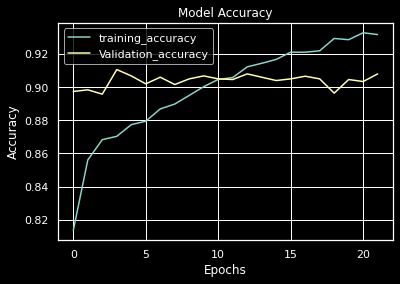

In [49]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['training_accuracy','Validation_accuracy'],loc='upper left')
plt.show()

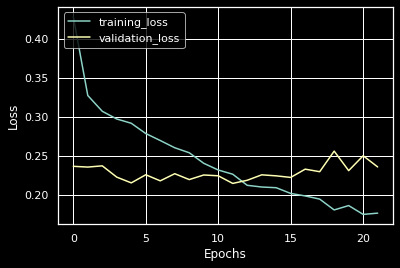

In [50]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['training_loss','validation_loss'],loc='upper left')
plt.show()

In [51]:
# %% [code]
model1.load_weights('final_cnn_code.h5')  
   
(eval_loss, eval_accuracy) = model1.evaluate(  
     validation_data, validation_labels, batch_size=batch_size, verbose=1)

print("Accuracy: {:.2f}%".format(eval_accuracy * 100))  
print("Loss: {}".format(eval_loss)) 



313/313 [==============================] - 1s 2ms/step - loss: 0.2353 - accuracy: 0.9082
Accuracy: 90.82%
Loss: 0.23527729511260986


In [52]:
# %% [code]
y_val=validate_df['category']
y_pred=model1.predict(validation_data)

# %% [code]
thresh=0.5
y_final=np.where(y_pred>thresh,1,0)




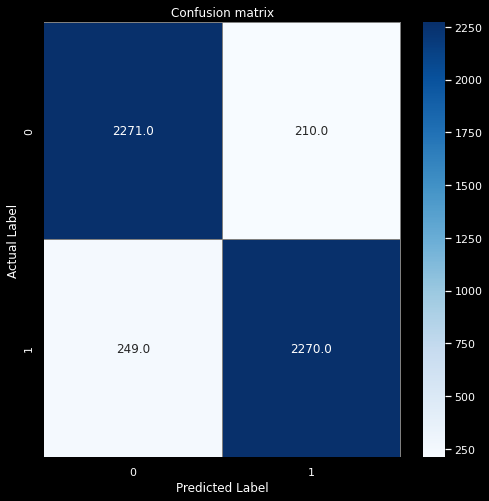

In [53]:
# %% [code]
cm=confusion_matrix(y_val,y_final)
f,ax=plt.subplots(figsize=(8,8))
sns.heatmap(cm,annot=True,linewidths=0.01,cmap='Blues',linecolor='gray',fmt='.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel('Actual Label')
plt.title('Confusion matrix')
plt.show()



In [54]:
# %% [code]
accScore=accuracy_score(y_val,y_final)
print(f' Accuracy score is {accScore}')
print()
classificationreport=classification_report(y_val,y_final)
print(f' Classification Report is --->')
print(classificationreport)



 Accuracy score is 0.9082

 Classification Report is --->
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      2481
           1       0.92      0.90      0.91      2519

    accuracy                           0.91      5000
   macro avg       0.91      0.91      0.91      5000
weighted avg       0.91      0.91      0.91      5000



In [55]:
# %% [code]
test_filename=test_images
test_df=pd.DataFrame({'filename':test_filename})
nb_samples=test_df.shape[0]

# %% [code]
test_datagen=ImageDataGenerator(
  rescale=1/255
)
test_generator=test_datagen.flow_from_dataframe(
   test_df,
    '/tmp/test1/',
   x_col='filename',
    y_col=None,
    target_size=img_size,
    class_mode=None,
    batch_size=batch_size,
     shuffle=False
)
test_df

Found 12500 validated image filenames.


,filename
0,10435.jpg
1,6790.jpg
2,4644.jpg
3,1835.jpg
4,1102.jpg
...,...
12495,4113.jpg
12496,1652.jpg
12497,3826.jpg
12498,8679.jpg


In [56]:
test_size=int(math.ceil(nb_samples/batch_size))
bottleneck_features_test=model.predict_generator(test_generator,test_size)
np.save(open('bottleneck_features_test.npy','wb'),bottleneck_features_test)
test_data=np.load(open('bottleneck_features_test.npy','rb'))

# %% [code]
y_pred=model1.predict(test_data)

# %% [code]
y_pred[0:20]

array([[5.0482107e-03],
       [9.9591029e-01],
       [2.5883949e-01],
       [3.1829101e-03],
       [2.1978962e-04],
       [1.4292274e-03],
       [9.8912209e-01],
       [2.7097542e-02],
       [6.0321409e-02],
       [4.7825673e-01],
       [9.4819237e-03],
       [9.9979490e-01],
       [1.5926333e-03],
       [2.7354635e-04],
       [3.4257793e-03],
       [7.9939783e-02],
       [3.3995515e-04],
       [9.9948823e-01],
       [6.0420942e-01],
       [1.9308876e-03]], dtype=float32)

In [57]:
threshold = 0.5
test_df['category'] = np.where( y_pred> threshold, 1,0)

# %% [code]
test_df

,filename,category
0,10435.jpg,0
1,6790.jpg,1
2,4644.jpg,0
3,1835.jpg,0
4,1102.jpg,0
...,...,...
12495,4113.jpg,1
12496,1652.jpg,1
12497,3826.jpg,1
12498,8679.jpg,0


In [58]:
Sub_df1=test_df.copy()
Sub_df1['id']=test_df['filename'].str.split('.').str[0]
Sub_df1['label']=test_df['category']
Sub_df1.drop(['filename','category'],axis=1,inplace=True)
Sub_df1.to_csv('Bottleneck_CatsVsDogs.csv',index=False)